In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mnist_utils as mu
import random
import pyNN.nest as p
import relu_utils as alg
import spiking_relu as sr
import cnn_utils as cnnu

In [2]:
import scipy.io as sio
tmp_x = sio.loadmat('mnist.mat')['test_x']
tmp_x = np.transpose(tmp_x, (2, 0, 1))
tmp_x = np.reshape(tmp_x, (tmp_x.shape[0], 28*28), order='F' )

tmp_y = sio.loadmat('mnist.mat')['test_y']
tmp_y = np.argmax(tmp_y, axis=0)

1.0


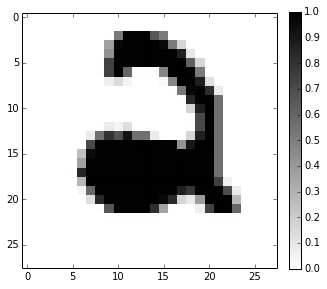

In [3]:
num_train = 100
tx = tmp_x[0:num_train]
mu.plot_digit(tx[0])
ty = tmp_y[0:num_train]
'''
SUM_rate = 2000.
for i in range(num_train):
    tx[i] = tx[i]/sum(tx[i])*SUM_rate
'''
print max(tx[0])

In [9]:
w, l = cnnu.readmat('cnn609.mat')
r = cnnu.test_softplus(w, l, tx)

In [10]:
w_new, a = cnnu.scale_weight(w, l, tx)

216.897841477 0.0575703929363
2.00733213978 45.5747651812
0.511357444016 11.636277092
0.99794808024 8.17774964573
0.140788467122 30.000040566


In [23]:
result_snn = np.argmax(a, axis=1)
result_cnn = np.argmax(r[-1][0], axis=1)
label = ty[:num_train]
print (result_snn == label).astype(int).sum(), (result_cnn == label).astype(int).sum()

92 92
